In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [31]:
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [32]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

C:\Users\Nando\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


### Cleaning data

In [33]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())

#print(titanic["Sex"].unique())
train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1
test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

#print(train["Embarked"].unique())
train["Embarked"] = train["Embarked"].fillna("S")
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2
test["Embarked"] = test["Embarked"].fillna("S")
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test["Fare"] = test["Fare"].fillna(train["Fare"].median())

### Functions

In [98]:
import re
import operator

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

def map_titles(df):
    titles = df["Name"].apply(get_title)
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
    for k,v in title_mapping.items():
        titles[titles == k] = v
    return titles

family_id_mapping = {}
def get_family_id(row):
    last_name = row["Name"].split(",")[0]
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

def map_family_ids(df):
    family_ids = df.apply(get_family_id, axis=1)
    family_ids[df["FamilySize"] < 3] = -1
    return family_ids

### Features

In [99]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
train["NameLength"] = train["Name"].apply(lambda x: len(x))
train["Title"] = map_titles(train)
train["FamilyId"] = map_family_ids(train)

test["FamilySize"] = test["SibSp"] + test["Parch"] + 1
test["NameLength"] = test["Name"].apply(lambda x: len(x))
test["Title"] = map_titles(test)
test["FamilyId"] = map_family_ids(test)

In [78]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength,Title,FamilyId
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,2,23,1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,2,51,3,-1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,22,2,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,2,44,3,-1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,24,1,-1


In [94]:
from sklearn import cross_validation
from sklearn import linear_model

predictors = predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength", "Title", "FamilyId"]

classifier_lr = linear_model.LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(classifier_lr, train[predictors], train["Survived"], cv=8)
print(scores.mean())

0.819309772435


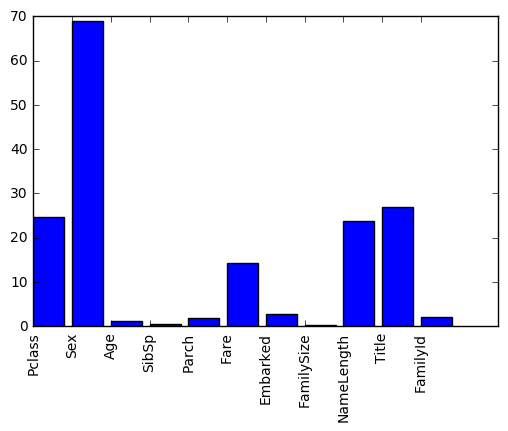

In [95]:
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength", "Title", "FamilyId"]

selector = SelectKBest(f_classif, k=5)
selector.fit(train[predictors], train["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [101]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

#predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength", "Title", "FamilyId"]
predictors = ["Pclass", "Sex", "Fare", "Title"]

classifier = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)
scores = cross_validation.cross_val_score(classifier, train[predictors], train["Survived"], cv=8)

print(scores.mean())

0.833920344858


In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=50, max_depth=8), ["Pclass", "Sex", "Fare", "Title"]],
    [linear_model.LogisticRegression(random_state=1), predictors]
]

full_predictions = []
for alg, predictors in algorithms:
    alg.fit(train[predictors], train["Survived"])
    predictions = alg.predict_proba(train[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)

accuracy = sum(predictions[predictions == train["Survived"]]) / len(predictions)
print(accuracy)

0.916947250281


C:\Users\Nando\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "NameLength", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Fare", "Title"]],
    [linear_model.LogisticRegression(random_state=1), predictors]
]

full_predictions = []
for alg, predictors in algorithms:
    alg.fit(train[predictors], train["Survived"])
    predictions = alg.predict_proba(test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)

submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions})
submission.to_csv("kaggle.csv", index=False)